In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("/content/daily-total-female-births.csv")

In [3]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
date = pd.date_range(start='1/1/1959', periods=len(df), freq='D')
date

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,Date,Births,Time_Stamp
0,1959-01-01,35,1959-01-01
1,1959-01-02,32,1959-01-02
2,1959-01-03,30,1959-01-03
3,1959-01-04,31,1959-01-04
4,1959-01-05,44,1959-01-05


In [6]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='Date', axis=1, inplace=True)
df.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

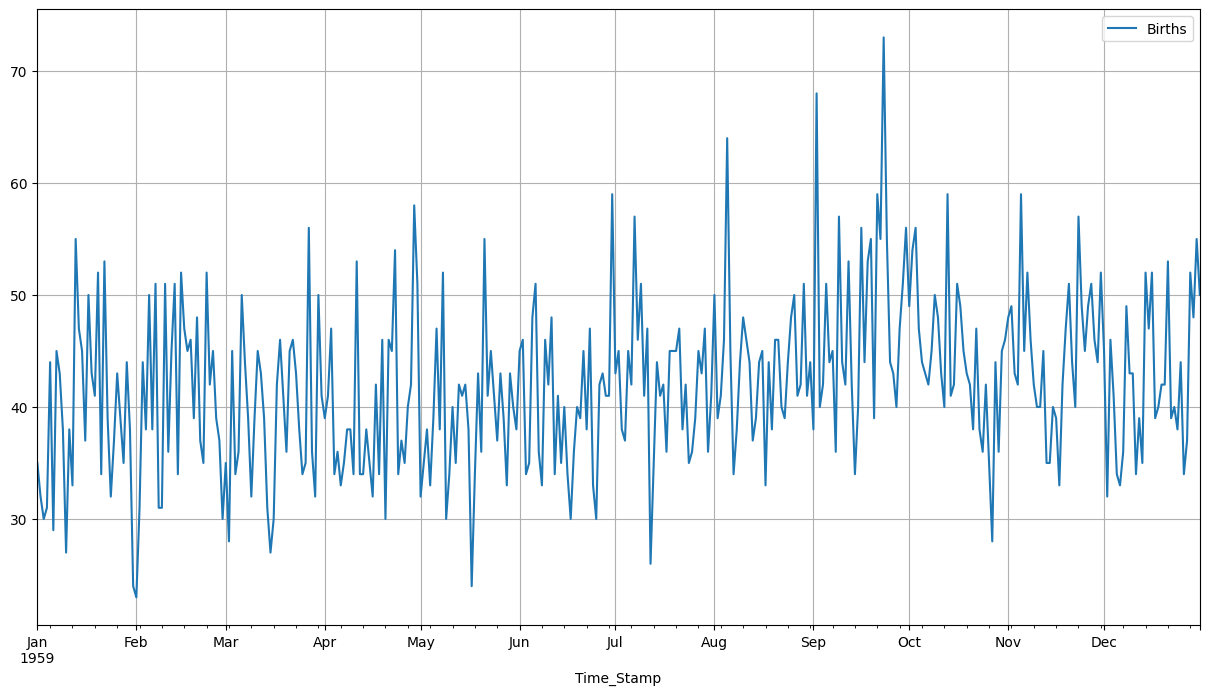

In [8]:
df.plot(grid=True);

In [9]:
round(df.describe(),3)

,Births
count,365.000
mean,41.981
std,7.348
min,23.000
25%,37.000
50%,42.000
75%,46.000
max,73.000


In [10]:
train    =   df[0:int(len(df)*0.7)]
test     =   df[int(len(df)*0.7):]

In [11]:
print(train.shape)
print(test.shape)

(255, 1)
(110, 1)


In [12]:
from IPython.display import display

In [13]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Last few rows of Training Data


,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


First few rows of Test Data


,Births
Time_Stamp,
1959-09-13,42
1959-09-14,34
1959-09-15,40
1959-09-16,56
1959-09-17,44


Last few rows of Test Data


,Births
Time_Stamp,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


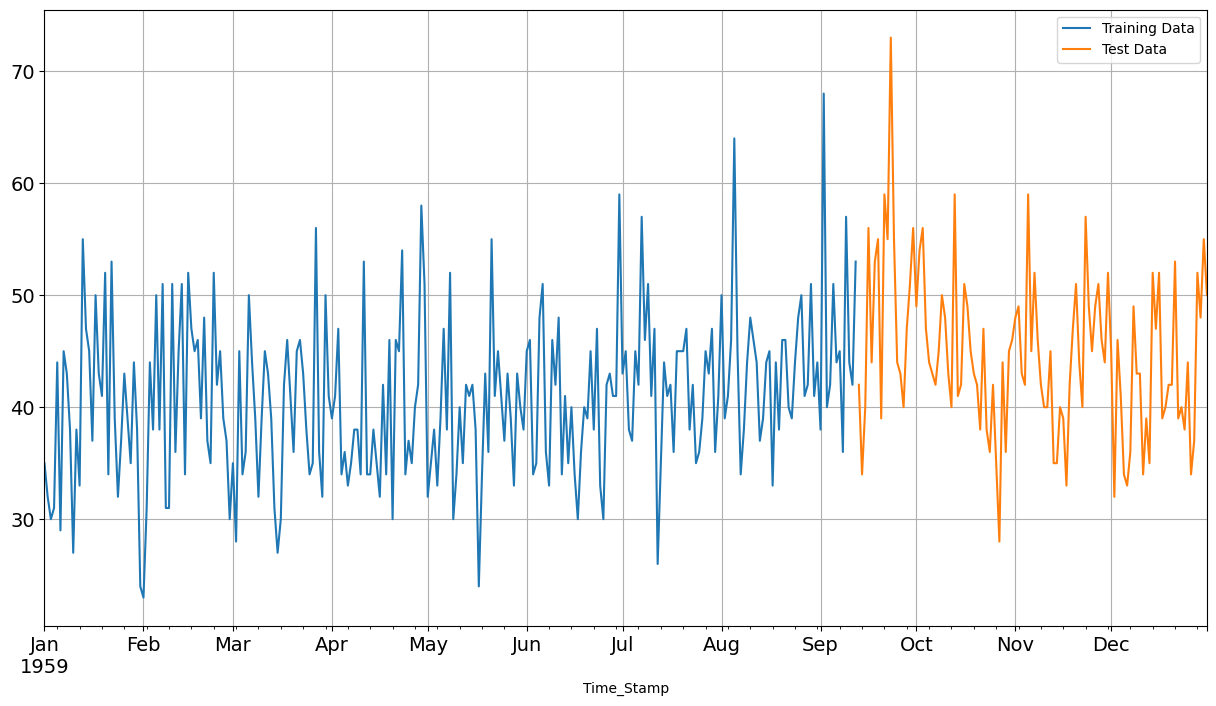

In [14]:
train['Births'].plot(fontsize=14)
test['Births'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [15]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [16]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [17]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Births,time
Time_Stamp,,
1959-01-01,35,1
1959-01-02,32,2
1959-01-03,30,3
1959-01-04,31,4
1959-01-05,44,5


Last few rows of Training Data


,Births,time
Time_Stamp,,
1959-09-08,36,251
1959-09-09,57,252
1959-09-10,44,253
1959-09-11,42,254
1959-09-12,53,255


First few rows of Test Data


,Births,time
Time_Stamp,,
1959-09-13,42,256
1959-09-14,34,257
1959-09-15,40,258
1959-09-16,56,259
1959-09-17,44,260


Last few rows of Test Data


,Births,time
Time_Stamp,,
1959-12-27,37,361
1959-12-28,52,362
1959-12-29,48,363
1959-12-30,55,364
1959-12-31,50,365


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Births'])

LinearRegression()

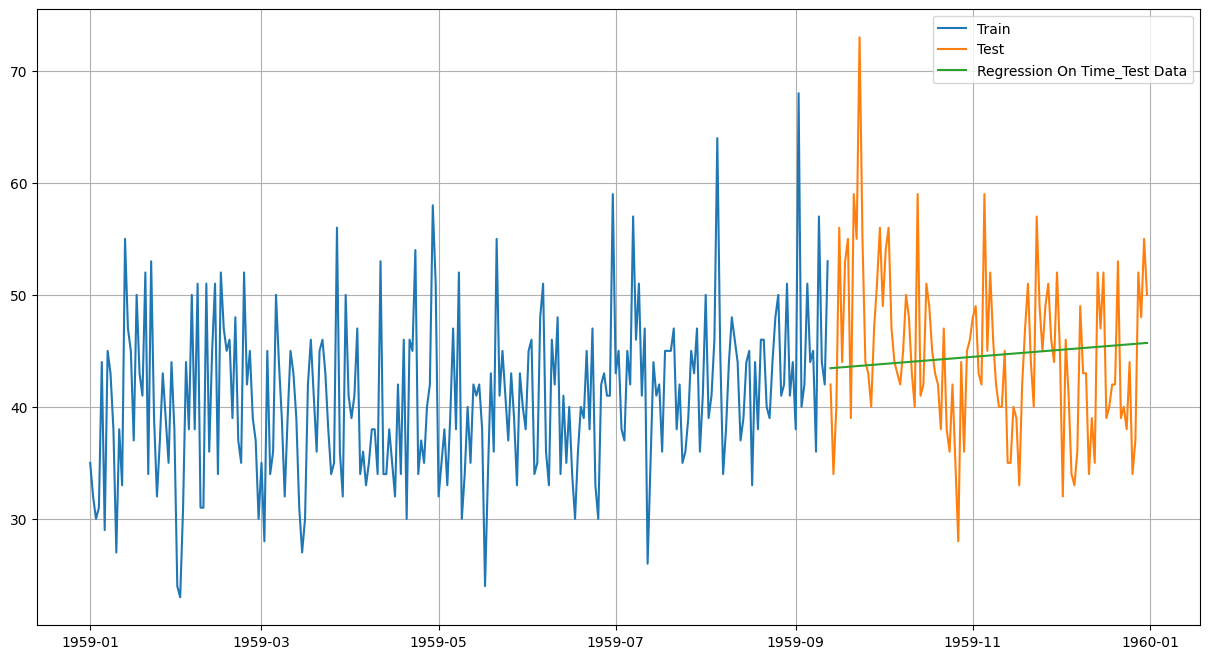

In [21]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [22]:
from sklearn import metrics

MODEL EVALUATION

In [23]:
rmse_model1_test = metrics.mean_squared_error(test['Births'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 7.392 


In [24]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,7.391597


NAIVE APPROACH

In [25]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [26]:
train.tail()

,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [27]:
NaiveModel_test['naive'] = np.asarray(train['Births'])[len(np.asarray(train['Births']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1959-09-13    53
1959-09-14    53
1959-09-15    53
1959-09-16    53
1959-09-17    53
Name: naive, dtype: int64

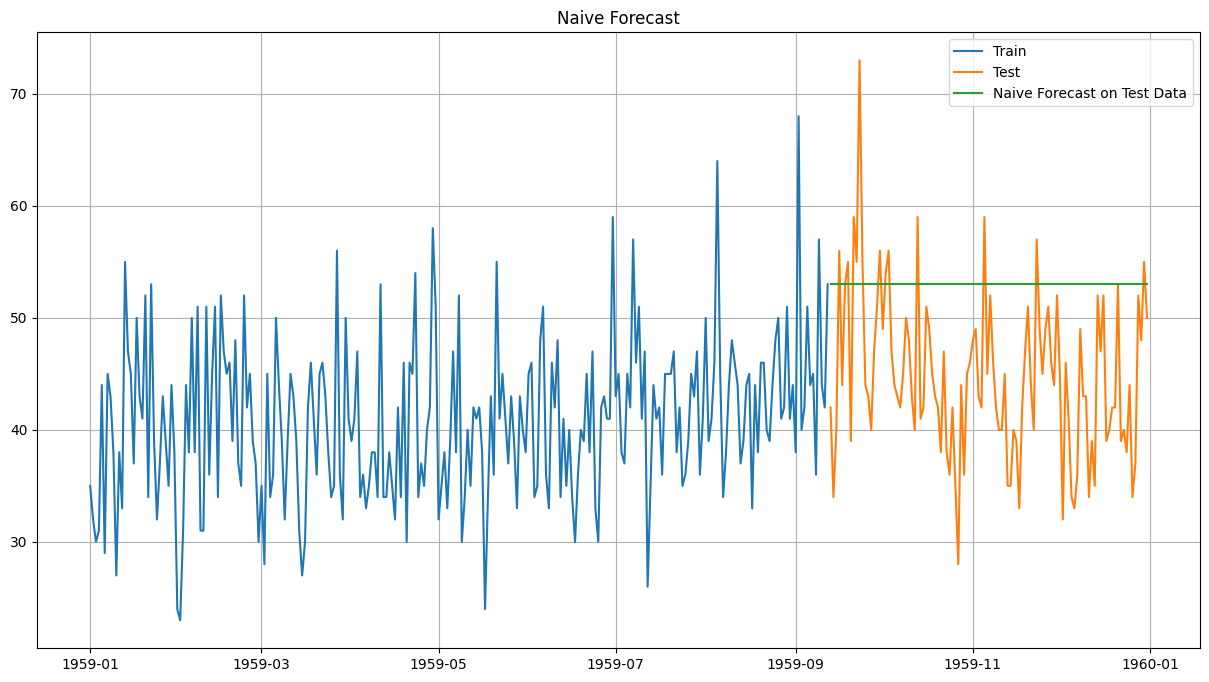

In [29]:
plt.plot(NaiveModel_train['Births'], label='Train')
plt.plot(test['Births'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [30]:
rmse_model2_test = metrics.mean_squared_error(test['Births'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.984


In [31]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286


SIMPLE AVERAGE FORECASTING METHOD

In [32]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [33]:
SimpleAverage_test['mean_forecast'] = train['Births'].mean()
SimpleAverage_test.head()

,Births,mean_forecast
Time_Stamp,,
1959-09-13,42,40.803922
1959-09-14,34,40.803922
1959-09-15,40,40.803922
1959-09-16,56,40.803922
1959-09-17,44,40.803922


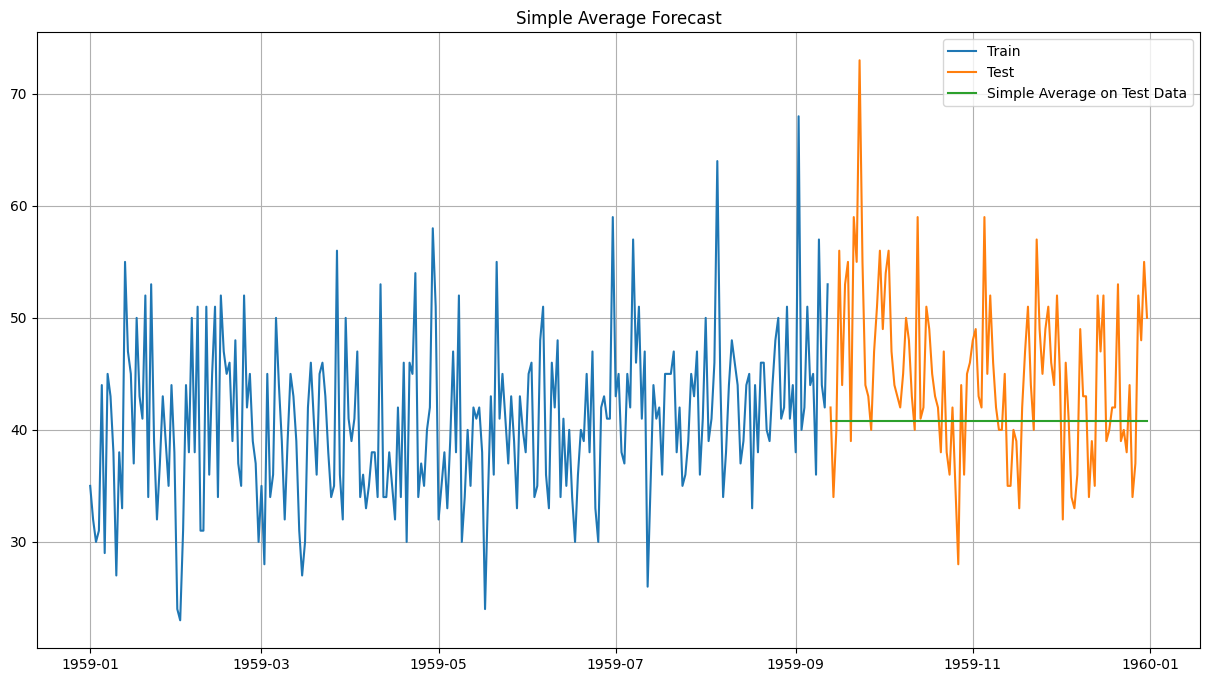

In [34]:
plt.plot(SimpleAverage_train['Births'], label='Train')
plt.plot(SimpleAverage_test['Births'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [35]:
rmse_model3_test = metrics.mean_squared_error(test['Births'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 8.195


In [36]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469


MOVING AVERAGE

In [37]:
MovingAverage = df.copy()
MovingAverage.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [38]:
MovingAverage['Trailing_2'] = MovingAverage['Births'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Births'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Births'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Births'].rolling(9).mean()

MovingAverage.head()

,Births,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,33.5,NaN,NaN,NaN
1959-01-03,30,31.0,NaN,NaN,NaN
1959-01-04,31,30.5,32.00,NaN,NaN
1959-01-05,44,37.5,34.25,NaN,NaN


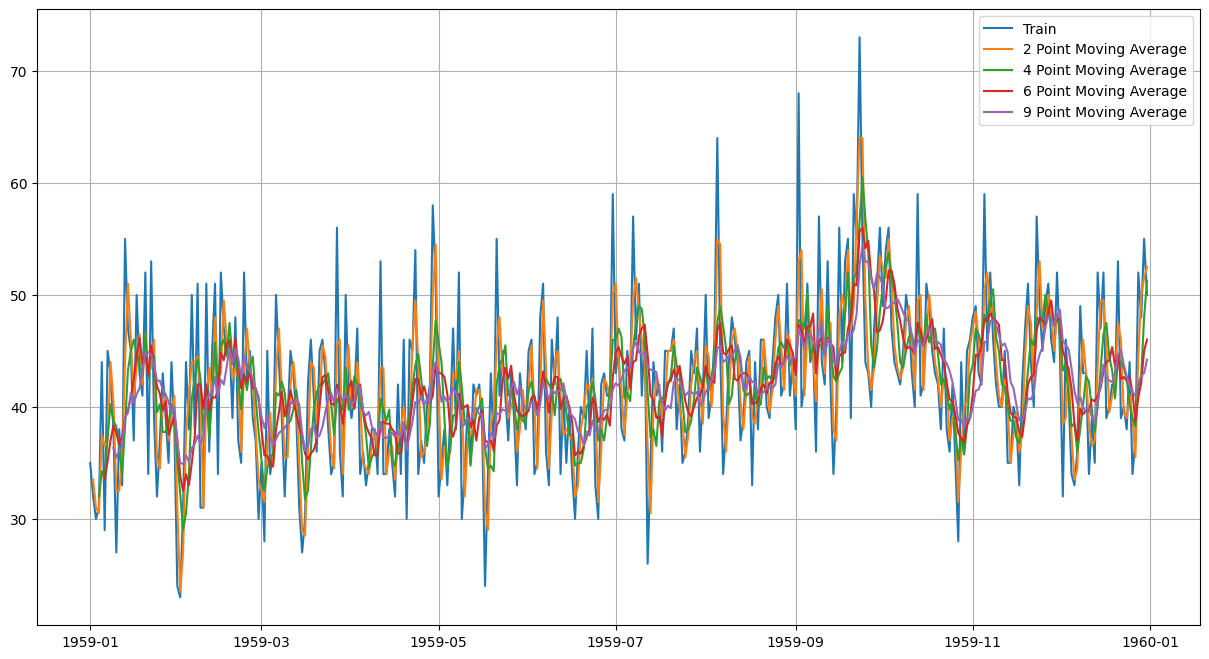

In [39]:
plt.plot(MovingAverage['Births'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [40]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)]
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

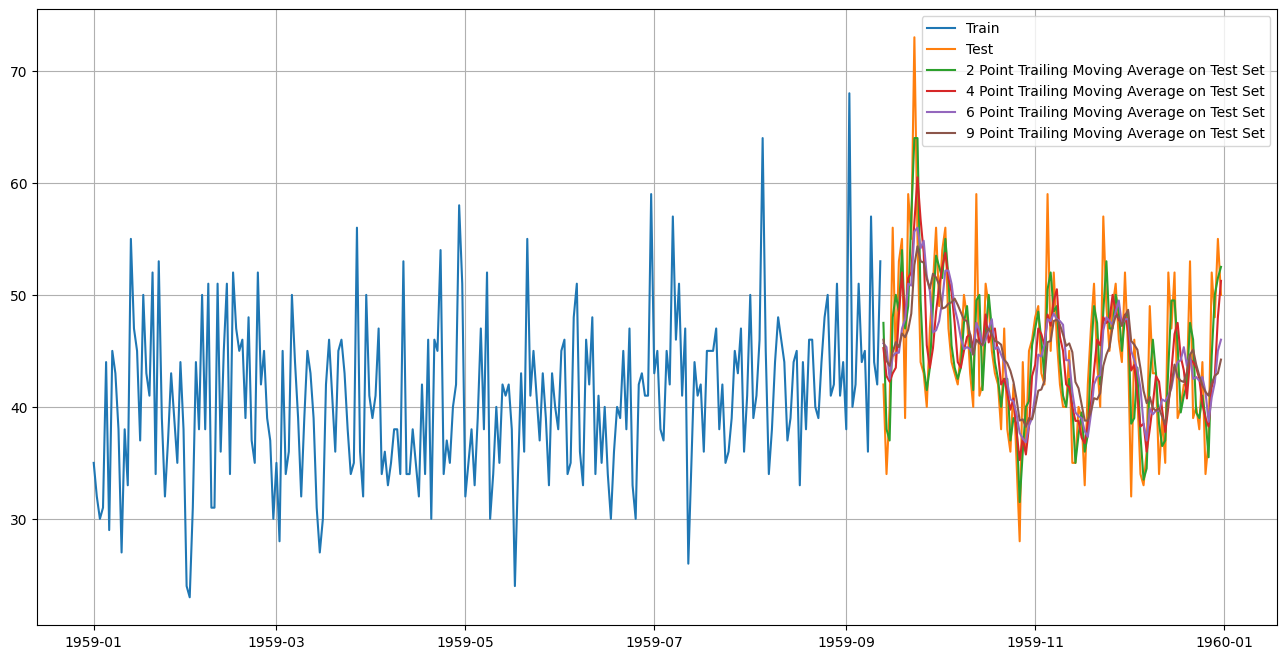

In [41]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Births'], label='Train')
plt.plot(trailing_MovingAverage_test['Births'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [42]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.158
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.531
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 6.109
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.502


In [43]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469
2pointTrailingMovingAverage,4.157961
4pointTrailingMovingAverage,5.531470
6pointTrailingMovingAverage,6.109316
9pointTrailingMovingAverage,6.502145


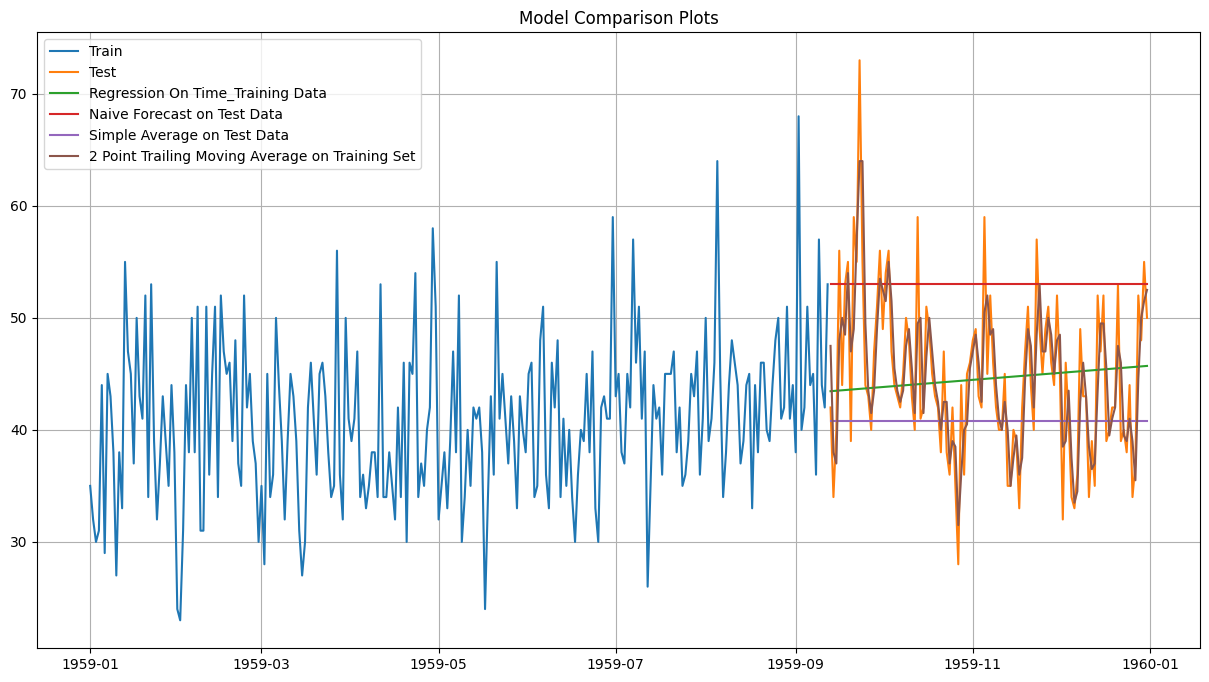

In [44]:
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

END